In [1]:
%run "Common Setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
filtered_rc = wosis.load_query_results('{}/initial_filtered_corpora.txt'.format(CACHE_DIR))
num_records = []

Identify overarching topics

In [11]:
topic_results = wosis.find_topics(filtered_rc, num_topics=10, cache_as=CACHE_DIR+'scale_10_topics')

Topic 1: soil moistur moisture content field spatial land wa cm measur
Topic 2: social network networks research user capit capital inform communiti communic
Topic 3: climat chang climate project change precipit futur scenario downscal temperatur
Topic 4: flow transport solut field porous hydraul dispers model pore heterogen
Topic 5: speci habitat spatial forest scale landscap species ecosystem area land
Topic 6: water irrig crop manag groundwat resourc qualiti river basin demand
Topic 7: wa concentr carbon treatment emiss field remov rate effect contamin
Topic 8: model data spatial use method estim scale resolut simul approach
Topic 9: runoff rainfal river catchment sediment basin flood hydrolog flow rainfall
Topic 10: urban land citi air health pollut pm sustain econom human


In [13]:
topic_ = topic_results.get_topic_by_id(1)
phrases = wosis.find_phrases(topic_)
phrases.all_phrases.head()

,,1,2,3,4,5
DOI,title,,,,,
10.1016/j.scitotenv.2005.02.015,Modelling through-soil transport of phosphorus to surface waters from livestock agriculture at the field and catchment scale (2005),the main contamin transport mechan consid at b...,"however, there wa a lack of inform about a num...","in the catchment study, a dairi farm is assum ...",this repres an altern to surfac runoff transpo...,it wa nevertheless conclud that through soil f...
10.3390/w10121817,"Assessment of Soil Erosion Dynamics Using the GIS-Based RUSLE Model: A Case Study of Wangjiagou Watershed from the Three Gorges Reservoir Region, Southwestern China (2018)","eros intens wa moderate, with a mean soil loss...",assess soil eros dynam in such watersh is use ...,"in the present study, the spatial and tempor p...",NaN,NaN
10.3390/su10124773,Vulnerability Assessment of Soil and Water Loss in Loess Plateau and Its Impact on Farmers' Soil and Water Conservation Adaptive Behavior (2018),physic capit ha a posit impact on farmer adopt...,it ha also provid a new perspect for studi the...,social capit ha a posit impact on farmer adopt...,financi capit ha a negat impact on farmer adop...,"finally, we use the binari logist model to est..."
10.1080/09593331608616261,ELECTRICAL-CONDUCTIVITY USED FOR EVALUATION OF COMPETING ION EFFECTS ON RADIONUCLIDE UPTAKE BY PLANT-ROOTS (1995),"in this study, use electr conduct (ec) wa prop...",although compet ion concentr is one of the sen...,"for cs-, the compet effect wa found to be rela...",NaN,NaN
10.1016/S0378-3774(99)00044-X,Analysis of DRAINMOD performances with different detail of soil input data in the Veneto region of Italy (2000),the object wa to determin whether a minim set ...,more elabor data improv the estimates.,the result indic that even veri limit input da...,NaN,NaN


In [14]:
topic_names = {
    1: 'Soil and Landscape',
    2: 'Social',
    3: 'Climate: Prediction',
    4: 'Hydrology: Solute Transport',
    5: 'Ecology/Landscape',
    6: 'Agricultural Management',
    7: 'Climate: Emissions',
    8: 'Modelling',
    9: 'Hydrology: Catchments',
    10: 'Urban/Landscape'
}

<Figure size 432x288 with 0 Axes>

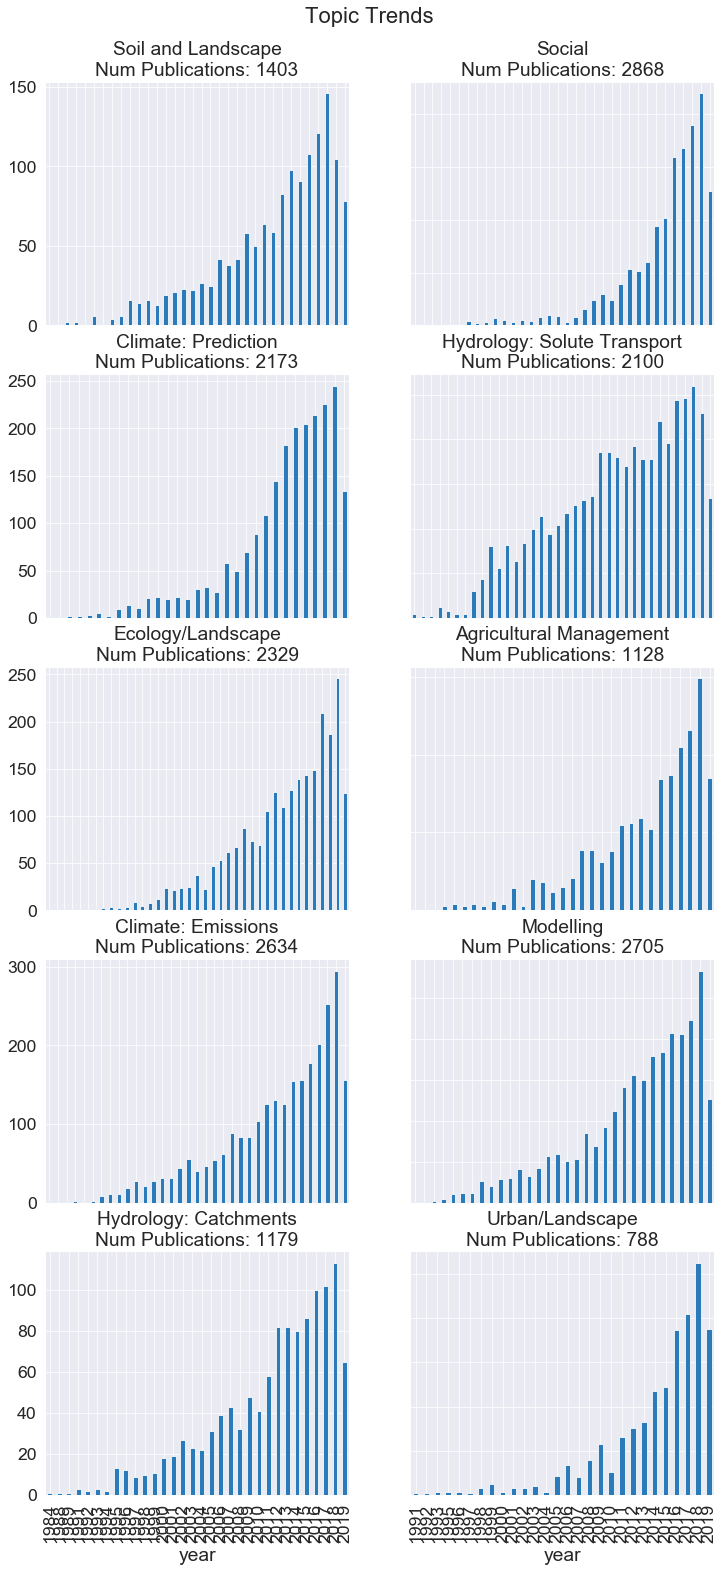

In [15]:
fig_cols = 2
fig_rows = round(topic_results.num_topics / fig_cols)

plt.tight_layout()
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(12,26))
plt.suptitle("Topic Trends", y=0.92, fontsize=22)
for t_id, ax_ in enumerate(axes.flatten()):
    topic_id = t_id + 1
    topic_ = topic_results.get_topic_by_id(topic_id)
    topic_.groupby('year').count()['title'].plot(kind='bar', 
                                                 color='#2b7bba', 
                                                 title='{}\nNum Publications: {}'.format(topic_names[topic_id], len(topic_.index)),
                                                 ax=ax_,
                                                 sharex=True,
                                                 sharey=True
                                                )
# End for